In [1]:
%matplotlib inline

In [2]:
from matplotlib.pylab import *

In [3]:
# repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
# style.use("results/style_sheet.mplstyle")

# rc('figure', figsize=(8, 4))
# rc('savefig', bbox='tight')
plt.rcParams.update({'font.size': 16})

import numpy as np
import torch
import torch.nn as nn
from models import resnet18_narrow as resnet18
from utils import get_loader
from utils.train_utils import AverageMeter, accuracy
import argparse
from sklearn.model_selection import ParameterGrid
import pickle
from tqdm import tqdm 
import copy
import glob
import numpy as np
import scipy
import copy

In [4]:
all_measures = ["eps_flat", "pac_bayes", "fro_norm", "fim", "local_entropy_grad_norm", "shannon_entropy", "eig_trace", "low_pass"]
labels = ["$\epsilon$ sharpness", "Pac Bayes", "$||H||_{F}$", "Fisher norm", "Local entropy", "Classical Entropy", "Trace", "Low pass filter"]

widths = sort([1, 3, 5, 7] + list(range(4, 60, 2)))

acc = []
gen_gap = []
x = np.zeros((len(all_measures), len(widths))) # measures x noise x seed 

for j, w in enumerate(widths):
    fol = f"checkpoints/cifar10_dd/resnet_dd_{w}/run_ms_0/measures.pkl"
    with open(fol, 'rb') as f:
        mtr = pickle.load(f)
    acc.append(1 - mtr["val_acc"]/100)
    gen_gap.append(np.abs(mtr["train_acc"]/100 - mtr["val_acc"]/100))
    for i,meas in enumerate(all_measures, 0):
        try:
            x[i,j] = np.abs(mtr[meas])
        except:
            print(fol, meas)
            continue
# x = x - x.min(1).reshape(-1, 1)
x = x/x.max(1).reshape(-1,1)

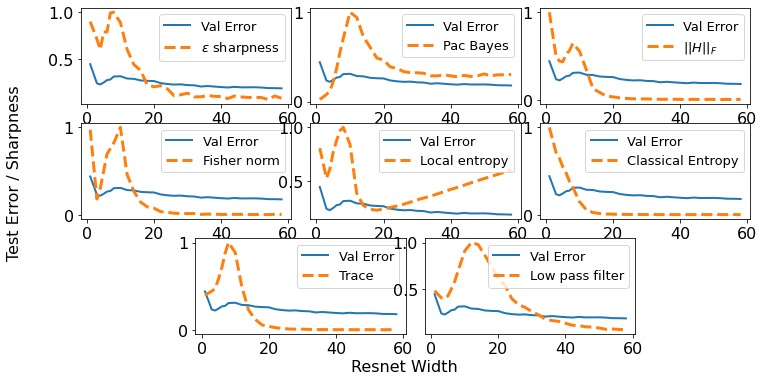

In [6]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(3,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((3,6), (0,2), colspan=2, sharex=ax1)
ax3 = plt.subplot2grid((3,6), (0,4), colspan=2, sharex=ax1)
ax4 = plt.subplot2grid((3,6), (1,0), colspan=2, sharex=ax1)
ax5 = plt.subplot2grid((3,6), (1,2), colspan=2, sharex=ax1)
ax6 = plt.subplot2grid((3,6), (1,4), colspan=2, sharex=ax1)
ax7 = plt.subplot2grid((3,6), (2,1), colspan=2, sharex=ax1)
ax8 = plt.subplot2grid((3,6), (2,3), colspan=2, sharex=ax1)
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# ax.plot(widths, gen_gap, linewidth=2, marker='o')

for i,meas in enumerate(all_measures,0):
    p = (int)(i / 3)
    q = i % 3
    axs[i].plot(widths, acc, label="Val Error", linewidth=2)
    axs[i].plot(widths, x[i,:], label=f"{labels[i]}",linewidth=3, linestyle="--")
    axs[i].legend(fontsize=13, loc=1)

fig.text(0.5, 0.04, 'Resnet Width', ha='center')
fig.text(0.04, 0.5, 'Test Error / Sharpness', va='center', rotation='vertical')
fig.savefig("results/dd.png")